In [6]:
#import sys
#!"{sys.executable}" -m pip install numpy
#!"{sys.executable}" -m pip install matplotlib
#!"{sys.executable}" -m pip install pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from functools import reduce
from typing import Collection, Any
results = pd.read_csv("../tests/examples/old_compilation.csv", delimiter=";")

# Plot methods

In [2]:
def sorted_modelsVScolumn(data: pd.core.frame.DataFrame, 
                          column: str, ascending: bool = True, 
                          legend: str = None,
                          xlabel: str = None, ylabel: str = None,
                          file_name:str = "image", 
                          fsize = 20
):
    ## Reading and filtering the data
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    sorted_data = data.sort_values(column, ascending = ascending)
    
    xs = range(1,len(data)+1)
    ys = [row[column] for (i, row) in sorted_data.iterrows()]
    
    ## Plotting the data
    legend = column if legend is None else legend
    ax.plot(xs,ys,label=legend,marker='o',linestyle='dashed',color='blue',linewidth=1,markersize=2)
    
    ## Setting some font sizes
    ax.axes.title.set_size(fsize)
    ax.axes.legend(fontsize=fsize-3)
    
    ## Setting axes labels
    xlabel = file_name if xlabel is None else xlabel
    ylabel = column if ylabel is None else ylabel
    ax.set_ylabel(ylabel,fontsize=fsize-7)
    ax.set_xlabel(xlabel,fontsize=fsize-6)
    
    ## Setting tick lables
    #plt.rc('xtick', labelsize=fsize-7)    # fontsize of the tick labels
    #plt.rc('ytick', labelsize=fsize-6)    # fontsize of the tick labels
    plt.xticks(rotation=45)

    ## Setting location of legend
    plt.legend(loc="lower right",fontsize=fsize-4)

    ## Saving file
    fig.fontsize=fsize
    fig.set_size_inches(8.5, 4)
    fig.savefig('figures/'+file_name+'.pdf',bbox_inches='tight')

# Getting images

## 1. RWE reductions with First observable

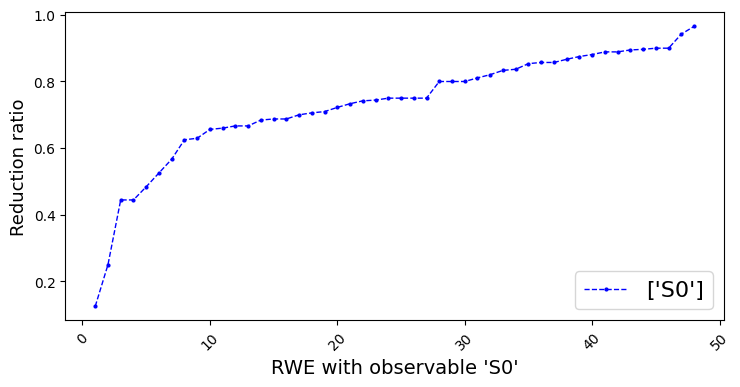

In [3]:
# Filtering the data
conditions_with_observable = [
    results["Read Alg."] == "uncertain",
    results["Unweighted"] == "No",
    results["Positive"] == "Yes",
    results["Disjoint"] == "Yes",
    results["Reducing"] == "Yes",
    results["Observables"] == "['S0']"
]
examples = results[reduce(lambda p, q: p & q, conditions_with_observable)]
sorted_modelsVScolumn(examples, "Red. ratio", legend="['S0']", xlabel="RWE with observable 'S0'", ylabel="Reduction ratio", file_name = "RWE_w_S0")

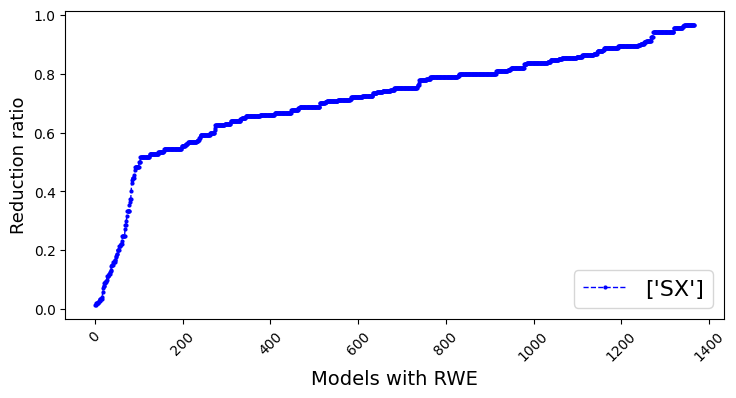

In [4]:
# Filtering the data
conditions_with_observable = [
    results["Read Alg."] == "uncertain",
    results["Unweighted"] == "No",
    results["Positive"] == "Yes",
    results["Disjoint"] == "Yes",
    results["Reducing"] == "Yes"
]
examples = results[reduce(lambda p, q: p & q, conditions_with_observable)]
sorted_modelsVScolumn(examples, "Red. ratio", legend="['SX']", xlabel="Models with RWE", ylabel="Reduction ratio", file_name = "RWE_w_S0")

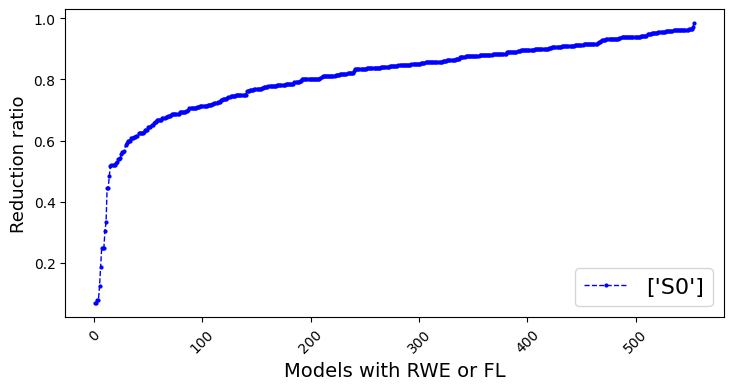

In [5]:
# Filtering the data
conditions_with_observable = [
    results["Read Alg."] == "uncertain",
    results["Positive"] == "Yes",
    results["Disjoint"] == "Yes",
    results["Reducing"] == "Yes",
    results["Observables"] == "['S0']"
]
examples = results[reduce(lambda p, q: p & q, conditions_with_observable)]
sorted_modelsVScolumn(examples, "Red. ratio", legend="['S0']", xlabel="Models with RWE or FL", ylabel="Reduction ratio", file_name = "RWE&FL_w_S0")

# Code from Andrea

In [88]:
add_info_text=False

def make_plot_grouped(names_to_csv_files,step=0.2,dropUnred=False,modelsToConsider=[]):
    fsize=20
    
    xi=0
    for outer_key in names_to_csv_files:
        #print(outer_key)
        grouped_files=names_to_csv_files[outer_key]
        #names_to_loaded_csv_files={ outer_key+"_"+key: pd.read_csv(grouped_files[key],index_col='ModelName') for key in grouped_files}
        names_to_loaded_csv_files={                key: pd.read_csv(grouped_files[key],index_col='ModelName') for key in grouped_files}
        
        if len(modelsToConsider)>0:
            #df2[df2.index.isin(df_red.index)]
            names_to_loaded_csv_files={            key: names_to_loaded_csv_files[key][names_to_loaded_csv_files[key].index.isin(modelsToConsider)] for key in names_to_loaded_csv_files}
        
        if dropUnred:
            names_to_loaded_csv_files={            key: names_to_loaded_csv_files[key][names_to_loaded_csv_files[key][' RedSp/OrigSp']<100.00] for key in names_to_loaded_csv_files}
        
            
        
        
        #print(names_to_loaded_csv_files)
        #failed={ key: names_to_loaded_csv_files[key][' ReductionSucceeded'][names_to_loaded_csv_files[key][' ReductionSucceeded']==0].count() for key in names_to_loaded_csv_files}
        #failed = {k : failed[k] for k in failed if failed[k]>0 }
        #print('Failed:')
        #print(failed)
                
        runtimes={ key: names_to_loaded_csv_files[key][names_to_loaded_csv_files[key][' ReductionSucceeded']==1][' Time(ms)'] for key in names_to_loaded_csv_files}
        print('Reduction runtimes')
        for k in runtimes:
            #print(k,runtimes[k][' Time(ms)'])
            #print(k,type(runtimes[k]))
            print(k,runtimes[k].max())
        print('done\n')
            
        ratios={ key: names_to_loaded_csv_files[key][names_to_loaded_csv_files[key][' ReductionSucceeded']==1][' RedSp/OrigSp']/100.0 for key in names_to_loaded_csv_files}
        #ratios={ key: names_to_loaded_csv_files[key][' RedSp/OrigSp']/100.0 for key in names_to_loaded_csv_files}
        
        #trivial={ key: names_to_loaded_csv_files[key][' ReducedSpecies'][names_to_loaded_csv_files[key][' ReducedSpecies']==1].count() for key in names_to_loaded_csv_files}
        #trivial = {k : trivial[k] for k in trivial if trivial[k]>0 }
        #no_red={ key: names_to_loaded_csv_files[key][' RedSp/OrigSp'][names_to_loaded_csv_files[key][' RedSp/OrigSp']>=99].count() for key in names_to_loaded_csv_files}
        #no_red = {k : no_red[k] for k in no_red if no_red[k]>0 }
        #print(no_red)
        # #print(trivial)
        # print(ratios['AND'],"\n")
        # print(ratios['OR'],"\n")
        x=[ratios[key] for key in ratios]
        n_models=max([len(ratios[key]) for key in ratios])
       
        fig, axes = plt.subplots(nrows=1, ncols=1)
        # plt.rcParams.update({
        #     "text.usetex": True #,"font.family": "sans-serif","font.sans-serif": "Helvetica",
        # })
        ax=axes
        labels=[key for key in ratios]
        #print(labels)
        ax.grid(axis='y')
        x2_0=np.sort(x[0])
        print(x2_0)
        #x2_0=x[0]
        ax.plot(range(1,len(x[0])+1),x2_0,label=labels[0],marker='o',linestyle='dashed',color='blue',linewidth=1,markersize=5)
        ax.grid(axis='y')        
        x2_1=np.sort(x[1])
        print(x2_1)        
        #x2_1=x[1]        
        ax.plot(range(1,len(x[0])+1),x2_1,label=labels[1],marker='o',linestyle='dashed',color='red',linewidth=1,markersize=5)#,alpha=.5
        ax.grid(axis='y')
        #ax.plot(range(len(x[1])),np.sort(x[1]))
        #sns.kdeplot(df['total_bill'], ax=ax2)
       
        # for key in ratios:
        #     ax.plot(x[key])
    
        #step=0.2#0.1#0.05
#         my_bins=np.arange(0,1.01,step)#np.arange(0,1.01,0.05)
#         #my_bins=[0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#         #my_bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#         hist, bins, im = ax.hist(x, bins=my_bins,histtype='bar'
#                             #, color=colors, 
#                             ,label=[key for key in ratios])
#         #print(bins)
#         print(hist)
#         if add_info_text:
#             #plt.text(0.0,n_models,str([histi[0] for histi in hist]),fontsize=15,color="red")
#             plt.text(0.0,n_models+0.05,"Trivial reduct: "+str(trivial)+"\n"+"No reduction: "+str(no_red)+"\nFailed:"+str(failed)+"\n",fontsize=15,color="red")
#             #plt.text(0.0,n_models+0.5,"No reduction: "+str(no_red),fontsize=15,color="red")
        #step=0.2#0.1
        my_yticks=np.arange(0,1.01,step)
        plt.yticks(my_yticks)
        my_xticks=np.arange(1,n_models+1,1)
        plt.xticks(my_xticks)      
        plt.xlim((0.8, n_models+0.2))
        ##plt.yticks([int(y) for y in ax.get_yticks()])
        ##plt.yticks(np.arange(0,n_models+1,1))
        ##plt.yticks(np.arange(0,n_models+1,2))
        #plt.yticks(np.arange(0,30+1,5))#FOR BNS
        #plt.yticks(np.arange(0,45+1,5))#FOR MNS
        #plt.yticks(np.arange(0,max_y+1,2))#FOR BNS

        ax.axes.title.set_size(fsize)
        ax.axes.legend(fontsize=fsize-3)

        #ax.set_ylabel("Number of models out of "+str(n_models),fontsize=fsize-4)
        ax.set_ylabel("Reduction ratios",fontsize=fsize-4)
        ax.set_xlabel(""+outer_key,fontsize=fsize-4)
        
        #ax2 = ax.twinx()
        #ax2.yaxis.set_ticks(np.arange(0,n_models+1,1))
        
        #plt.grid(False)
        plt.rc('xtick', labelsize=fsize-7)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=fsize-6)    # fontsize of the tick labels
        plt.xticks(rotation=45)
        
        #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=16)
        plt.legend(loc="lower right",fontsize=fsize-4)

        fig.fontsize=fsize
        fig.set_size_inches(8.5, 4)
        file_name=outer_key.replace(' ','').replace('(','').replace(')','')
        fig.savefig('figures/'+file_name+'.pdf',bbox_inches='tight')

### GinSim+BioModels DB

#### Only outputs: one block

Reduction runtimes
AND 524075
OR 557838
done

Reduction runtimes
MIN 864418
MAX 5126789
done



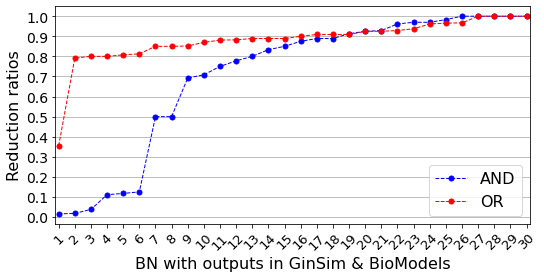

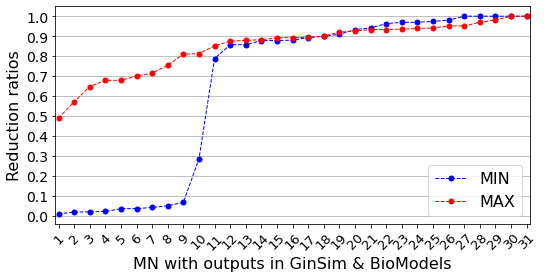

In [16]:
csvFiles={
    "BN with outputs in GinSim & BioModels":
         {
             'AND':'ReductionsBioModelsAndGinSim/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_AND_clean.csv',
          'OR':'ReductionsBioModelsAndGinSim/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_OR_clean.csv'
            #'AND':'ReductionsBioModelsAndGinSim/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_AND.csv',
          #'OR':'ReductionsBioModelsAndGinSim/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_OR.csv'
          #,'XOR':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_XOR.csv'
         }
    ,
    "MN with outputs in GinSim & BioModels":
         {'MIN':'ReductionsBioModelsAndGinSim/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
          'MAX':'ReductionsBioModelsAndGinSim/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv'
          #,'XOR':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_XOR.csv'
         }
}

make_plot_grouped(csvFiles,step=0.1)

In [104]:
csv_min='ReductionsBioModelsAndGinSim/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv'
csv_max='ReductionsBioModelsAndGinSim/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv'
df=pd.read_csv(csv_max)
df

,ModelName,Reduction,ReductionSucceeded,Time(ms),InitPartition,Species,ReducedSpecies,RedSp/OrigSp,Reactions,ReducedReactions,Parameters,
0,m2018_zanudo_proliferationzginml,FME,1,4565,2,17,16,94.12,17,16,0,
1,ap_boundaryzginml,FME,1,14279,2,28,25,89.29,28,25,0,
2,Bladder_Modelzginml,FME,1,34552,2,30,28,93.33,30,28,0,
3,BRAF_Modelzginml,FME,1,62842,2,33,32,96.97,33,32,0,
4,Cacace_Tdev_2nov2019zginml,FME,1,125581,2,56,38,67.86,56,38,0,
5,Collombet_model_Bcell_Macrophages_PNAS_170215z...,FME,1,56162,2,33,29,87.88,33,29,0,
6,core_engine_budding_yeast_CCzginml,FME,1,21625,2,27,25,92.59,27,25,0,
7,Dpp__Pathway_11Jun2013zginml,FME,1,3572,2,15,14,93.33,15,14,0,
8,DrosoMesoLogModelzginml,FME,1,102157,2,48,39,81.25,48,39,0,
9,EGF__Pathway_12Jun2013_0zginml,FME,1,16905,2,25,23,92.00,25,23,0,


## Weigthed networks

In [86]:
#df=pd.read_csv('weightedNetworks/weightedGraphs200/RndTIMES_USER_discrete.csv',index_col='ModelName')
df=pd.read_csv('weightedNetworks/weightedGraphs200/RndTIMES_USER_discrete_clean.csv',index_col='ModelName')
#df=pd.read_csv('weightedNetworks/weightedGraphs200/RndTIMES_USER_continuous.csv',index_col='ModelName')
print(len(df))
df_red=df[df[' RedSp/OrigSp']<100.00]
print(len(df_red))
df_red.index.values

72
21


array(['ambassador_1985_1989', 'ambassador_1990_1994', 'ambassador_2002',
       'ambassador_2003', 'ambassador_2004', 'ambassador_2005',
       'ambassador_2006', 'ambassador_2007', 'ambassador_KINSHIP',
       'dom_Hayaki_1989b', 'dom_Sandel_2017a', 'dom_Sandel_2017b',
       'plant_pol_vazquez_All_sites_pooled',
       'plant_pol_vazquez_Arroyo_Goye', 'plant_pol_vazquez_Cerro_Lopez',
       'plant_pol_vazquez_Llao_Llao', 'plant_pol_vazquez_Mascardi__c_',
       'plant_pol_vazquez_Mascardi__nc_',
       'plant_pol_vazquez_Quetrihue__c_',
       'plant_pol_vazquez_Quetrihue__nc_', 'plant_pol_vazquez_Safariland'],
      dtype=object)

615
Reduction runtimes
Discr. time 727604
Cont. time 838971
done

[0.2292 0.25   0.25   0.2569 0.2639 0.2917 0.3056 0.3125 0.3125 0.3194
 0.3264 0.4028 0.5625 0.625  0.7083 0.75   0.7639 0.9091 0.9375 0.9375
 0.9583]
[0.2345 0.2759 0.2759 0.2828 0.2941 0.2941 0.3034 0.3172 0.331  0.3529
 0.3529 0.3931 0.5882 0.6471 0.7083 0.7647 0.7655 0.9091 0.9412 0.9412
 0.9583]


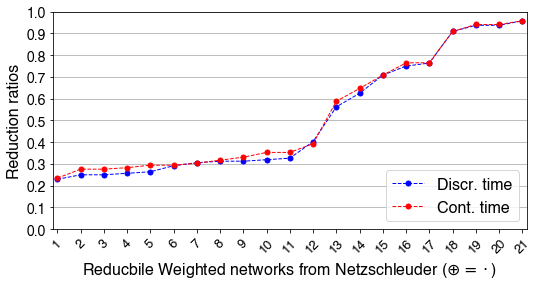

In [89]:
csvFiles={
    "Reducbile Weighted networks from Netzschleuder ($\oplus=\cdot$)":
    #"Reducbile Weighted networks from Netzschleuder":
         {
        'Discr. time':'weightedNetworks/weightedGraphs200/RndTIMES_USER_discrete_clean.csv',
        'Cont. time':'weightedNetworks/weightedGraphs200/RndTIMES_USER_continuous.csv'     
        #'Discr. time':'weightedNetworks/weightedGraphs200/old_RndTIMES_USER200_discr.csv',
        #'Cont. time':'weightedNetworks/weightedGraphs200/old_RndTIMES_USER200_cont.csv'
        #
         # 'Discr. time':'weightedNetworks/weightedGraphs200/RndTIMES_USER200_cont.csv',
         # 'Cont. time':'weightedNetworks/weightedGraphs200/RndTIMES_USER200_cont.csv'
         }
}

#df=pd.read_csv('weightedNetworks/weightedGraphs200/RndTIMES_USER200_discr.csv',index_col='ModelName')
df=pd.read_csv('weightedNetworks/weightedGraphs200/RndTIMES_USER_discrete.csv',index_col='ModelName')
print(len(df))
df_red=df[df[' RedSp/OrigSp']<100.00]
models_to_consider=df_red.index.values
make_plot_grouped(csvFiles,step=0.1,dropUnred=False,modelsToConsider=models_to_consider)

In [69]:
models_to_consider

array(['ambassador_1985_1989', 'ambassador_1990_1994', 'ambassador_2002',
       'ambassador_2003', 'ambassador_2004', 'ambassador_2005',
       'ambassador_2006', 'ambassador_2007', 'ambassador_KINSHIP',
       'dom_Anderson_2016d', 'dom_Archie_2006b', 'dom_Archie_2006h',
       'dom_Cafazzo_2010b', 'dom_Collias_1951a', 'dom_Frank_1986a',
       'dom_Funkhouser_2018b', 'dom_Hass_1991b', 'dom_Hass_1991c',
       'dom_Hayaki_1989b', 'dom_Holekamp_1993a', 'dom_Holekamp_1993b',
       'dom_Kohda_1991', 'dom_Murray_2007', 'dom_Patterson_1977',
       'dom_Samuels_1987b', 'dom_Sandel_2017a', 'dom_Sandel_2017b',
       'dom_Seyfarth_1976f', 'dom_Shimoji_2014a', 'dom_Shimoji_2014b',
       'dom_Shimoji_2014c', 'dom_White_2007a', 'dom_White_2007b',
       'dom_White_2007c', 'highschool',
       'plant_pol_vazquez_All_sites_pooled',
       'plant_pol_vazquez_Arroyo_Goye', 'plant_pol_vazquez_Cerro_Lopez',
       'plant_pol_vazquez_Llao_Llao', 'plant_pol_vazquez_Mascardi__c_',
       'plant_pol_v

In [70]:
df_cont=pd.read_csv('weightedNetworks/weightedGraphs200/RndTIMES_USER200_cont.csv',index_col='ModelName')
df_discr=pd.read_csv('weightedNetworks/weightedGraphs200/RndTIMES_USER200_discr.csv',index_col='ModelName')
#print(len(df_cont[df_cont[' RedSp/OrigSp']<100]))
#print(len(df_discr[df_discr[' RedSp/OrigSp']<100]))
#df_discr[df_discr[' RedSp/OrigSp']<100]
print(len(df_discr))
print(len(df_discr[df_discr[' RedSp/OrigSp']<100]))

1233
44


## Histograms - all aggregation functions in same plot

In [24]:
add_info_text=False

def make_hist_plot_grouped(names_to_csv_files,max_y=30,step=0.2):
    fsize=20
    
    xi=0
    for outer_key in names_to_csv_files:
        #print(outer_key)
        grouped_files=names_to_csv_files[outer_key]
        #names_to_loaded_csv_files={ outer_key+"_"+key: pd.read_csv(grouped_files[key],index_col='ModelName') for key in grouped_files}
        names_to_loaded_csv_files={                key: pd.read_csv(grouped_files[key],index_col='ModelName') for key in grouped_files}
        #print(names_to_loaded_csv_files)
        failed={ key: names_to_loaded_csv_files[key][' ReductionSucceeded'][names_to_loaded_csv_files[key][' ReductionSucceeded']==0].count() for key in names_to_loaded_csv_files}
        failed = {k : failed[k] for k in failed if failed[k]>0 }
        #print('Failed:')
        #print(failed)
                
        ratios={ key: names_to_loaded_csv_files[key][names_to_loaded_csv_files[key][' ReductionSucceeded']==1][' RedSp/OrigSp']/100.0 for key in names_to_loaded_csv_files}
        #ratios={ key: names_to_loaded_csv_files[key][' RedSp/OrigSp']/100.0 for key in names_to_loaded_csv_files}
        
        trivial={ key: names_to_loaded_csv_files[key][' ReducedSpecies'][names_to_loaded_csv_files[key][' ReducedSpecies']==1].count() for key in names_to_loaded_csv_files}
        trivial = {k : trivial[k] for k in trivial if trivial[k]>0 }
        no_red={ key: names_to_loaded_csv_files[key][' RedSp/OrigSp'][names_to_loaded_csv_files[key][' RedSp/OrigSp']>=99].count() for key in names_to_loaded_csv_files}
        no_red = {k : no_red[k] for k in no_red if no_red[k]>0 }
        #print(no_red)
        
        #print(trivial)
        
        #print(ratios)
        x=[ratios[key] for key in ratios]
        n_models=max([len(ratios[key]) for key in ratios])
        #print(x)
        
        fig, axes = plt.subplots(nrows=1, ncols=1)
        ax=axes
        #sns.kdeplot(df['total_bill'], ax=ax2)
        
        #step=0.2#0.1#0.05
        my_bins=np.arange(0,1.01,step)#np.arange(0,1.01,0.05)
        #my_bins=[0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
        #my_bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
        hist, bins, im = ax.hist(x, bins=my_bins,histtype='bar'
                            #, color=colors, 
                            ,label=[key for key in ratios])
        #print(bins)
        print(hist)
        if add_info_text:
            #plt.text(0.0,n_models,str([histi[0] for histi in hist]),fontsize=15,color="red")
            plt.text(0.0,n_models+0.05,"Trivial reduct: "+str(trivial)+"\n"+"No reduction: "+str(no_red)+"\nFailed:"+str(failed)+"\n",fontsize=15,color="red")
            #plt.text(0.0,n_models+0.5,"No reduction: "+str(no_red),fontsize=15,color="red")
        #step=0.2#0.1
        #my_xticks=np.arange(0,1.01,step)
        my_xticks = bins
        #my_xticks = [0.1, 0.20, 0.3, 0.40, 0.5, 0.60, 0.7,0.80, 0.9]
        plt.xticks(my_xticks)
        ##plt.yticks([int(y) for y in ax.get_yticks()])
        ##plt.yticks(np.arange(0,n_models+1,1))
        ##plt.yticks(np.arange(0,n_models+1,2))
        #plt.yticks(np.arange(0,30+1,5))#FOR BNS
        #plt.yticks(np.arange(0,45+1,5))#FOR MNS
        plt.yticks(np.arange(0,max_y+1,2))#FOR BNS

        ax.axes.title.set_size(fsize)
        ax.axes.legend(fontsize=fsize-4)

        #ax.set_ylabel("Number of models out of "+str(n_models),fontsize=fsize-4)
        ax.set_ylabel("Number of models",fontsize=fsize-4)
        ax.set_xlabel("Reduction ratios for "+outer_key,fontsize=fsize-4)
        
        #ax2 = ax.twinx()
        #ax2.yaxis.set_ticks(np.arange(0,n_models+1,1))
        
        plt.grid(False)
        plt.rc('xtick', labelsize=fsize-5)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=fsize-5)    # fontsize of the tick labels
        
        #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=16)
        plt.legend(loc="upper center",fontsize=16)

        fig.fontsize=fsize
        fig.set_size_inches(8, 4)
        file_name=outer_key.replace(' ','').replace('(','').replace(')','')
        fig.savefig('figures/'+file_name+'.pdf',bbox_inches='tight')

### GinSim+BioModels DB

#### Only outputs: one block

[[ 3.  3.  0.  0.  0.  2.  1.  3.  6. 13.]
 [ 0.  0.  0.  1.  0.  0.  0.  1. 13. 16.]]


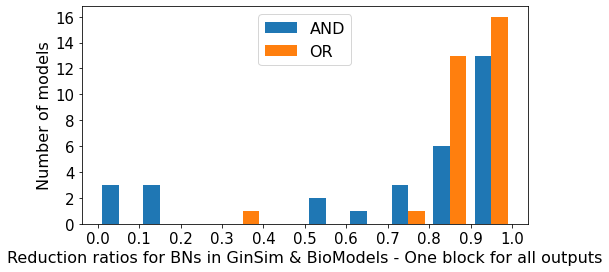

In [25]:
csvFiles={
    "BNs in GinSim & BioModels - One block for all outputs":
         {'AND':'ReductionsBioModelsAndGinSim/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_AND.csv',
          'OR':'ReductionsBioModelsAndGinSim/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_OR.csv'
          #,'XOR':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_XOR.csv'
         }
    ,
    # ,
    # 'MNs in GinSim (MAX)':#'MN_GinSim_FME_MAX':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MAX.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
    #      }
    # ,
    # 'MNs in GinSim (MIN)':#'MN_GinSim_FME_MIN':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MIN.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
    #      }  
}
make_hist_plot_grouped(csvFiles,16,0.1)

[[ 8.  0.  1.  0.  0.  0.  0.  1.  5. 14.]
 [ 0.  0.  0.  0.  1.  1.  3.  2.  9. 13.]]


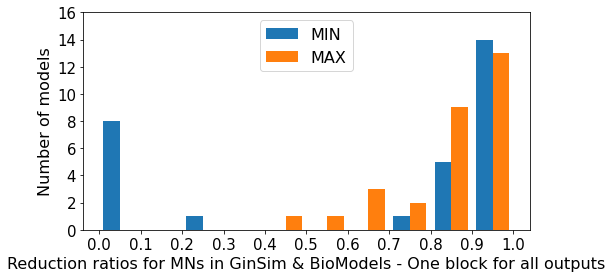

In [16]:
csvFiles={
    "MNs in GinSim & BioModels - One block for all outputs":
         {'MIN':'ReductionsBioModelsAndGinSim/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
          'MAX':'ReductionsBioModelsAndGinSim/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv'
          #,'XOR':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_XOR.csv'
         }
    ,
    # ,
    # 'MNs in GinSim (MAX)':#'MN_GinSim_FME_MAX':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MAX.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
    #      }
    # ,
    # 'MNs in GinSim (MIN)':#'MN_GinSim_FME_MIN':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MIN.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
    #      }  
}
make_hist_plot_grouped(csvFiles,16,0.1)

### BioModels DB

#### Only outputs: one block

[[0. 0. 0. 0. 0. 2. 0. 1. 2. 2.]
 [0. 0. 0. 1. 0. 0. 0. 0. 2. 4.]]


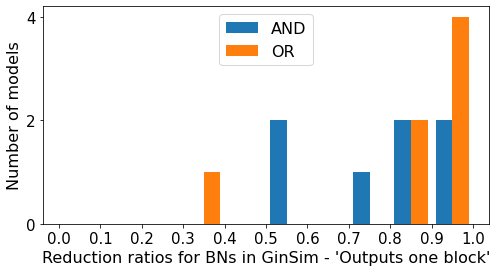

In [20]:
csvFiles={
    "BNs in GinSim - 'Outputs one block'":
         {'AND':'Biomodels_in_SBML_format_ERODE/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_AND.csv',
          'OR':'Biomodels_in_SBML_format_ERODE/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_OR.csv'
          #,'XOR':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_XOR.csv'
         }
    ,
    # ,
    # 'MNs in GinSim (MAX)':#'MN_GinSim_FME_MAX':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MAX.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
    #      }
    # ,
    # 'MNs in GinSim (MIN)':#'MN_GinSim_FME_MIN':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MIN.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
    #      }  
}
make_hist_plot_grouped(csvFiles,4,0.1)


#### Old

[[9. 0. 0. 0. 1.]
 [5. 1. 0. 0. 4.]]
[[0. 0. 2. 0. 5.]
 [0. 1. 0. 0. 6.]]
[[0. 0. 0. 1. 1.]
 [2. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 2.]]


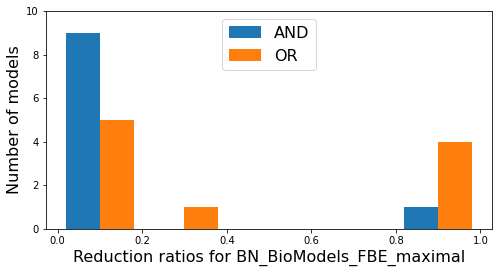

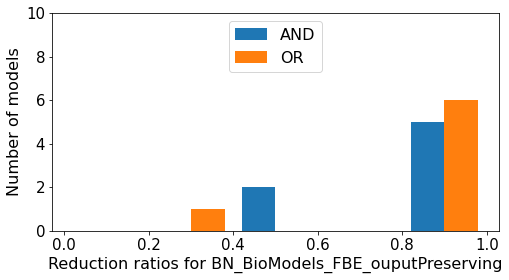

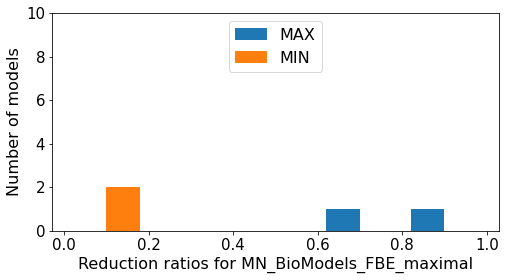

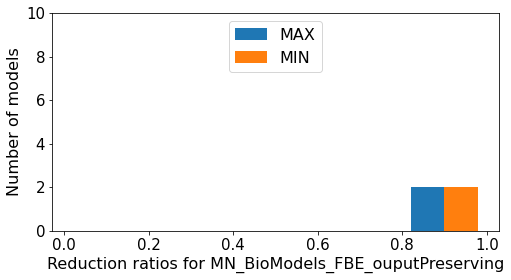

In [3]:
csvFiles={
    'BN_BioModels_FBE_maximal':
         {'AND':'Biomodels_in_SBML_format_ERODE/BNs_outputs/reductionsMaximalFBE_AND.csv',
          #'inputres_FBE_AND':'Biomodels_in_SBML_format_ERODE/BNs_inputs/reductionsInputPreservingFBE_AND.csv',
          #'outputpres_AND':'Biomodels_in_SBML_format_ERODE/BNs_outputs/reductionsOutputPreservingFBE_AND.csv',
          'OR':'Biomodels_in_SBML_format_ERODE/BNs_outputs/reductionsMaximalFBE_OR.csv'#,
          #'inputpres_FBE_OR':'Biomodels_in_SBML_format_ERODE/BNs_inputs/reductionsInputPreservingFBE_OR.csv',
          #'outputpres_OR':'Biomodels_in_SBML_format_ERODE/BNs_outputs/reductionsOutputPreservingFBE_OR.csv'    
         }
    ,
    'BN_BioModels_FBE_ouputPreserving':
         {#'max_AND':'Biomodels_in_SBML_format_ERODE/BNs_inputs/reductionsMaximalFBE_AND.csv',
          #'inputres_FBE_AND':'Biomodels_in_SBML_format_ERODE/BNs_inputs/reductionsInputPreservingFBE_AND.csv',
          'AND':'Biomodels_in_SBML_format_ERODE/BNs_outputs/reductionsOutputPreservingFBE_AND.csv'
          ,
          #'max_OR':'Biomodels_in_SBML_format_ERODE/BNs_inputs/reductionsMaximalFBE_OR.csv',
          #'inputpres_FBE_OR':'Biomodels_in_SBML_format_ERODE/BNs_inputs/reductionsInputPreservingFBE_OR.csv',
          'OR':'Biomodels_in_SBML_format_ERODE/BNs_outputs/reductionsOutputPreservingFBE_OR.csv'    
         }
    ,
    'MN_BioModels_FBE_maximal':
         {#'PLUS':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsMaximalFME_PLUS.csv',
          #'outputpres_PLUS':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_PLUS.csv'   
          #,
          #'TIMES':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsMaximalFME_TIMES.csv',
          #'outputpres_TIMES':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_TIMES.csv'    
          #,
          'MAX':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsMaximalFME_MAX.csv',
          #'outputpres_MAX':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
          #,
          'MIN':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsMaximalFME_MIN.csv'#,
          #'outputpres_MIN':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
         }
    ,
    'MN_BioModels_FBE_ouputPreserving':
         {#'max_PLUS':'Biomodels_in_SBML_format_ERODE/MNs_inputs/reductionsMaximalFME_PLUS.csv',
          #'PLUS':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_PLUS.csv'   
          #,
          #'max_TIMES':'Biomodels_in_SBML_format_ERODE/MNs_inputs/reductionsMaximalFME_TIMES.csv',
          #'TIMES':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_TIMES.csv'    
          #,
          #'max_MAX':'Biomodels_in_SBML_format_ERODE/MNs_inputs/reductionsMaximalFME_MAX.csv',
          'MAX':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
          ,
          #'max_MIN':'Biomodels_in_SBML_format_ERODE/MNs_inputs/reductionsMaximalFME_MIN.csv',
          'MIN':'Biomodels_in_SBML_format_ERODE/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
         }
}
make_hist_plot_grouped(csvFiles,10)

### GinSim

#### Only outputs: one block

[[ 3.  3.  0.  0.  0.  0.  1.  2.  4. 11.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. 11. 12.]]


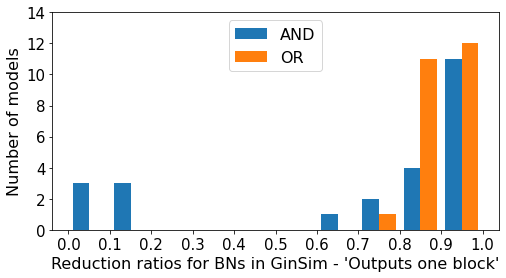

In [21]:
csvFiles={
    "BNs in GinSim - 'Outputs one block'":
         {'AND':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_AND.csv',
          'OR':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_OR.csv'
          #,'XOR':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_XOR.csv'
         }
    ,
    # ,
    # 'MNs in GinSim (MAX)':#'MN_GinSim_FME_MAX':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MAX.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
    #      }
    # ,
    # 'MNs in GinSim (MIN)':#'MN_GinSim_FME_MIN':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MIN.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
    #      }  
}
make_hist_plot_grouped(csvFiles,15,0.1)

[[ 0.  0.  0.  0.  1.  1.  3.  2.  9. 13.]
 [ 8.  0.  1.  0.  0.  0.  0.  1.  5. 14.]]


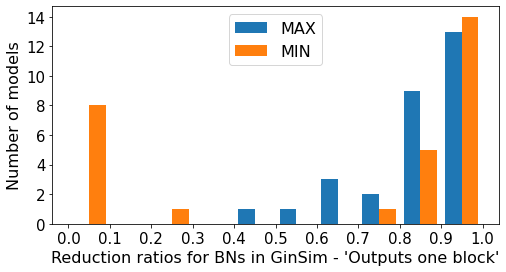

In [22]:
csvFiles={
    "BNs in GinSim - 'Outputs one block'":
         {'MAX':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
          'MIN':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv'
         }
    ,
    # ,
    # 'MNs in GinSim (MAX)':#'MN_GinSim_FME_MAX':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MAX.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
    #      }
    # ,
    # 'MNs in GinSim (MIN)':#'MN_GinSim_FME_MIN':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MIN.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
    #      }  
}
make_hist_plot_grouped(csvFiles,15,0.1)

#### Grouping by technique

[[28.  1.  0.  2.  2.]
 [ 6.  0.  0.  3. 15.]
 [ 0.  0.  0.  1. 23.]]
[[ 3.  0.  0.  1. 29.]
 [ 0.  0.  0.  1. 23.]
 [ 0.  0.  0.  1. 23.]]
[[ 3.  0.  0.  1. 29.]
 [ 0.  0.  0.  0. 24.]
 [ 0.  0.  0.  0. 24.]]
[[ 0.  2.  0.  1. 45.]
 [ 0.  0.  2.  5. 22.]
 [ 0.  0.  0.  1. 28.]]
[[12.  3.  0.  0. 33.]
 [ 8.  1.  0.  1. 19.]
 [ 0.  0.  0.  0. 29.]]


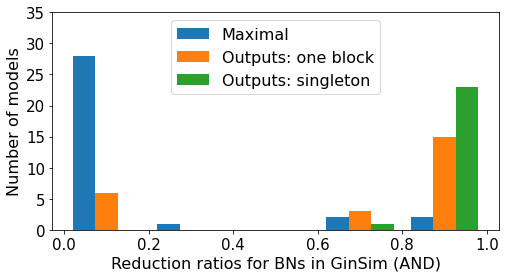

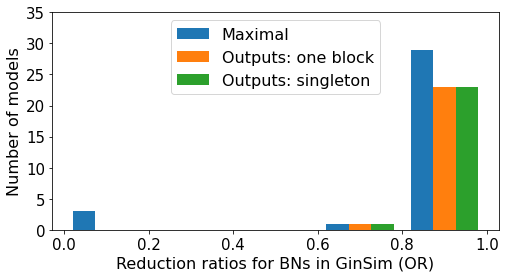

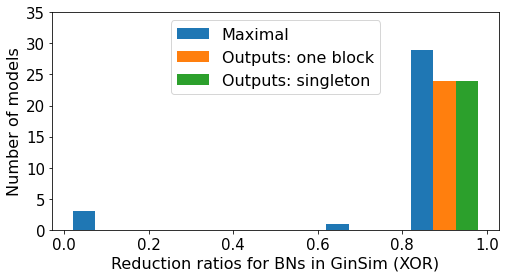

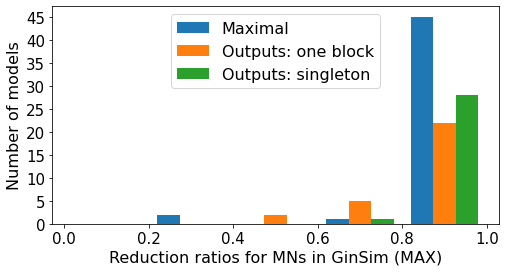

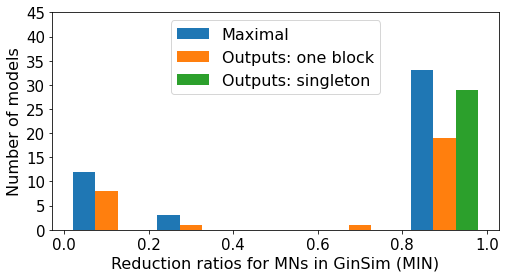

In [25]:
csvFiles={
    'BNs in GinSim (AND)':#'BN_GinSim_FBE_AND':
         {'Maximal':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs/reductionsMaximalFBE_AND.csv',
          'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_AND.csv',
          'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs/reductionsOutputPreservingFBE_AND.csv'
         }
    ,
    'BNs in GinSim (OR)':#'BN_GinSim_FBE_OR':
         {'Maximal':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs/reductionsMaximalFBE_OR.csv',
          'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_OR.csv',
          'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs/reductionsOutputPreservingFBE_OR.csv'
         }
    ,
    'BNs in GinSim (XOR)':#'BN_GinSim_FBE_OR':
         {'Maximal':'GINSIM_SBML_format_ERODE_hpc/BNs_outputs/reductionsMaximalFBE_OR.csv',
          'Outputs: one block':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFBE_XOR.csv',
          'Outputs: singleton':'GINSIM_SBML_format_ERODE_XOR/BNs_outputs/reductionsOutputPreservingFBE_XOR.csv'
         }    
    # ,
    # 'MNs in GinSim (MAX)':#'MN_GinSim_FME_MAX':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MAX.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
    #      }
    # ,
    # 'MNs in GinSim (MIN)':#'MN_GinSim_FME_MIN':
    #      {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MIN.csv',
    #       'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
    #       'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
    #      }  
}
make_hist_plot_grouped(csvFiles,35)

csvFiles={
    'MNs in GinSim (MAX)':#'MN_GinSim_FME_MAX':
         {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MAX.csv',
          'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MAX.csv',
          'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MAX.csv'
         }
    ,
    'MNs in GinSim (MIN)':#'MN_GinSim_FME_MIN':
         {'Maximal':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsMaximalFME_MIN.csv',
          'Outputs: one block':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs_oneBlock/reductionsOutputPreservingOneBlockFME_MIN.csv',
          'Outputs: singleton':'GINSIM_SBML_format_ERODE_hpc/MNs_outputs/reductionsOutputPreservingFME_MIN.csv'
         }  
}
make_hist_plot_grouped(csvFiles,45)

#### Grouping by initial partition

## Trash - old stuff

In [9]:
maximal = pd.read_csv('largescale/MaximalReduction.csv',index_col='ID')
#maximal

In [10]:
ID = pd.read_csv('largescale/IDReduction.csv',index_col='ID')
#ID

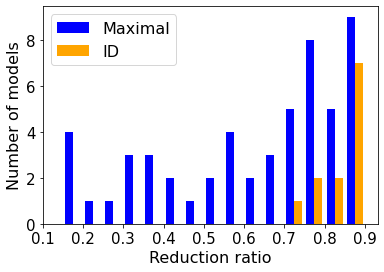

In [11]:
import numpy as np
fsize=20#17
fig, axes = plt.subplots(nrows=1, ncols=1)
ax=axes
x=[maximal['Maximal ratio'].values,ID['ID ratio'].values]
colors = ['blue','orange']

#my_bins=[0, 0.10, 0.20, 0.3, 0.40, 0.5, 0.60, 0.7,0.80, 0.9,1]
first=0.15
#first=0.05
step=0.05
my_bins=[]
#while first <= 1.0:
while first <= 0.95:
    my_bins.append(first)
    first=first+step
#my_bins=np.arange(0,1,0.05)
#print(my_bins)
hist, bins, im = ax.hist(x, bins=my_bins, 
                    histtype='bar', color=colors, 
                    label=['Maximal','ID'])

 # change the x ticks
#my_xticks = bins
my_xticks = [0.1, 0.20, 0.3, 0.40, 0.5, 0.60, 0.7,0.80, 0.9]
plt.xticks(my_xticks)

ax.axes.title.set_size(fsize)
ax.axes.legend(fontsize=fsize-4)

ax.set_ylabel("Number of models",fontsize=fsize-4)
ax.set_xlabel("Reduction ratio",fontsize=fsize-4)
#plt.grid(True)
plt.rc('xtick', labelsize=fsize-4)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fsize-4)    # fontsize of the tick labels

fig.fontsize=fsize
fig.savefig('Hist_LargeScale.pdf',bbox_inches='tight')

array([[<AxesSubplot:title={'center':'ID ratio'}>]], dtype=object)

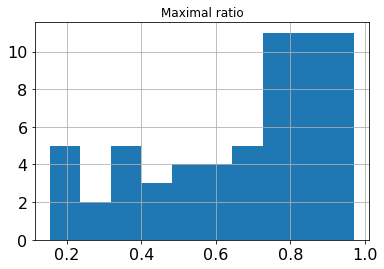

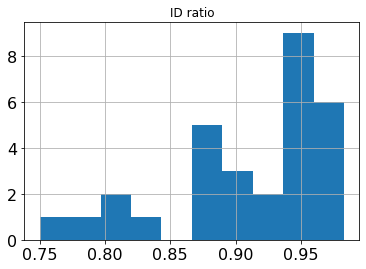

In [12]:
maximal.hist()

ID.hist()

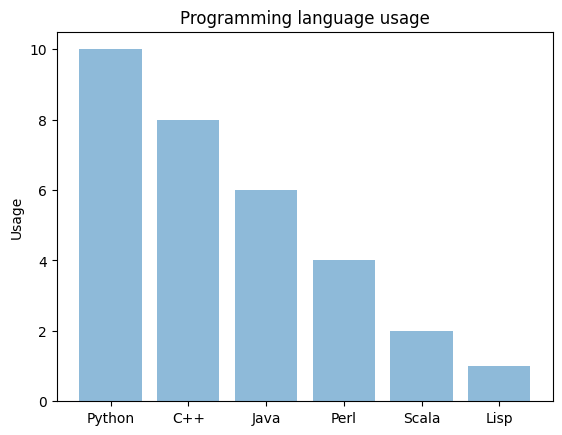

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

<AxesSubplot:xlabel='ID'>

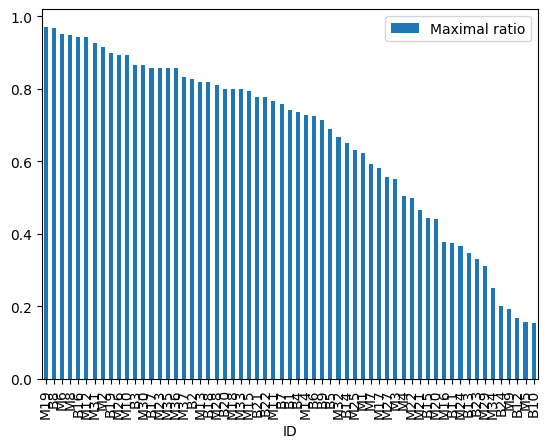

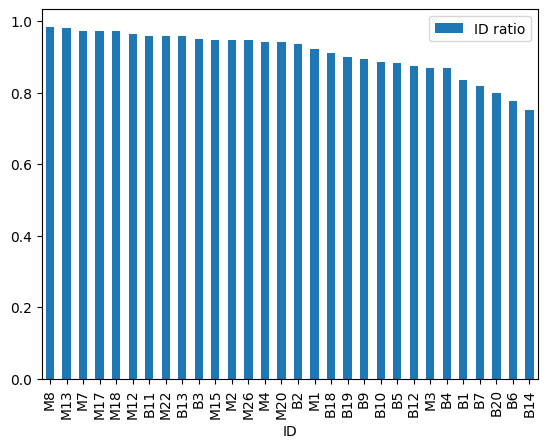

In [14]:
maximal.plot.bar()

ID.plot.bar()

## One figure per case